<a href="https://colab.research.google.com/github/Sammm21/ML/blob/main/Tabular_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.2MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 194kB 8.9MB/s 
     |████████████████████████████████| 1.2MB 13.2MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
Mounted at /content/gdrive


In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samandersson","key":"e2e87ade15a0215e39c38cce55836fe3"}'}

In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Jul 12 19:30 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List available datasets.
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           9103  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5560  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2013  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2393  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
#hide
from fastbook import *
from kaggle import api
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

# **Tabular Modeling**

Although deep learning is nearly always clearly superior for unstructured data, these two approaches tend to give quite similar results for many kinds of structured data. But ensembles of decision trees tend to train faster, are often easier to interpret, do not require special GPU hardware for inference at scale, and often require less hyperparameter tuning. They have also been popular for quite a lot longer than deep learning, so there is a more mature ecosystem of tooling and documentation around them.

Most importantly, the critical step of interpreting a model of tabular data is significantly easier for decision tree ensembles. There are tools and methods for answering the pertinent questions, like: Which columns in the dataset were the most important for your predictions? How are they related to the dependent variable? How do they interact with each other? And which particular features were most important for some particular observation?

Therefore, ensembles of decision trees are our first approach for analyzing a new tabular dataset.

**The exception to this guideline is when the dataset meets one of these conditions:**

- **There are some high-cardinality categorical variables that are very important ("cardinality" refers to the number of discrete levels representing categories, so a high-cardinality categorical variable is something like a zip code, which can take on thousands of possible levels).**
- **There are some columns that contain data that would be best understood with a neural network, such as plain text data.**

In practice, when we deal with datasets that meet these exceptional conditions, we always try both decision tree ensembles and deep learning to see which works best. In practice things tend to be less cut-and-dried, and there will often be a mixture of high- and low-cardinality categorical variables and continuous variables.

Either way, it's clear that we are going to need to add decision tree ensembles to our modeling toolbox!

## **Categorical Embeddings B**

*Entity embedding not only reduces memory usage and speeds up neural networks
compared with one-hot encoding, but more importantly by mapping similar values
close to each other in the embedding space it reveals the intrinsic properties of the categorical variables…[It] is especially useful for datasets with lots of high cardinality features, where other methods tend to overfit…As entity embedding defines a distance measure for categorical variables, it can be used for visualizing categorical data and for data clustering.*

An entity embedding layer is the same thing as placing an ordinary linear layer after the one hot encoded input layer as shown in the diagram below:

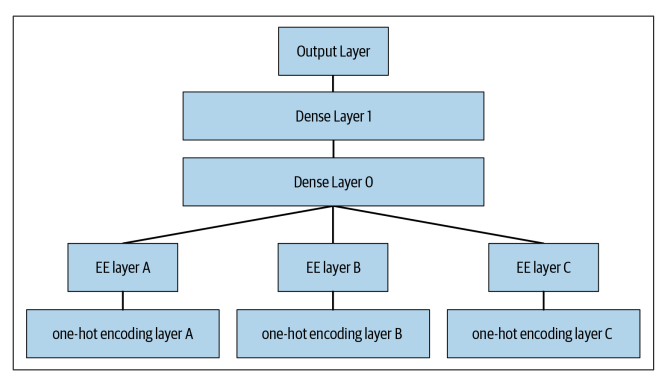

Thus from the point of view of training an embedding layer is just another layer in the neural net. 

In the entity embeddings paper the authors discovered something quite cool: that embeddings transform the categorical variables into inputs that are both continuous and meaningful: **The actual physical location of the German states were not part of the provided data, yet the model itsel learned where they must be based only on the behavior of store sales!:**

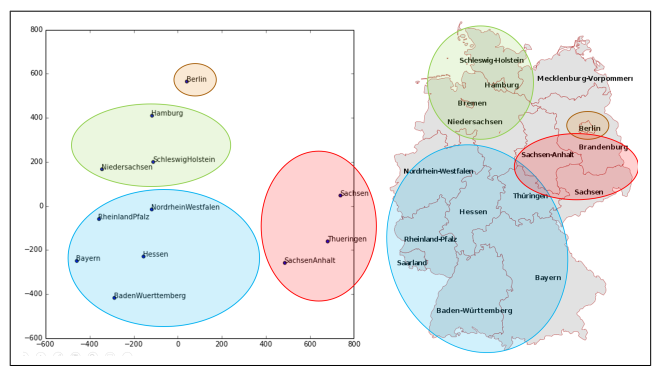

Plot below shows the distances between embeddings plotted against the physical distances between the stores, which we can see are clearly corrolated:

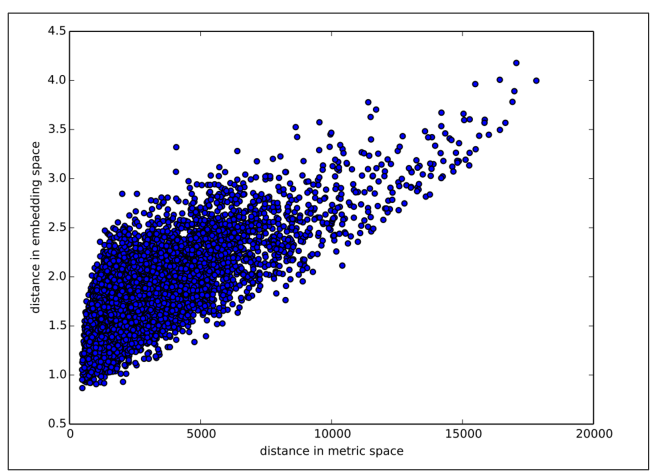

Same goes for embeddings of days of the week or months of the year B:

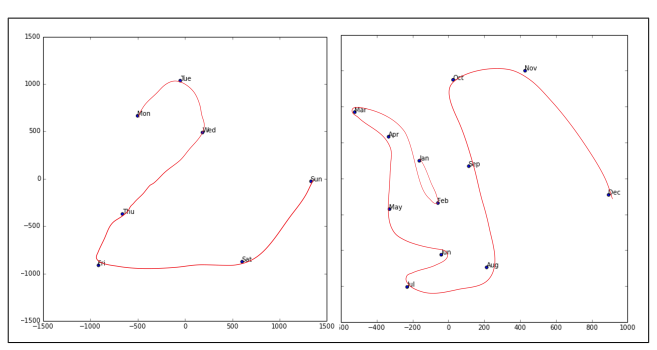

What stands out in these two examples is that we provide the model fundamentally
categorical data about discrete entities (e.g., German states or days of the week), and
then the model learns an embedding for these entities that defines a continuous
notion of distance between them. Because the embedding distance was learned based
on real patterns in the data, that distance tends to match up with our intuitions.

What stands out is that this suggest that we can turn our categorical variables into continous embeddings and then seemlessly combine those with other continuous variables/inputs. This is what Googs did and does for it's recommendation in Googs store (paper: wide and deep learning for recommender systems,B):

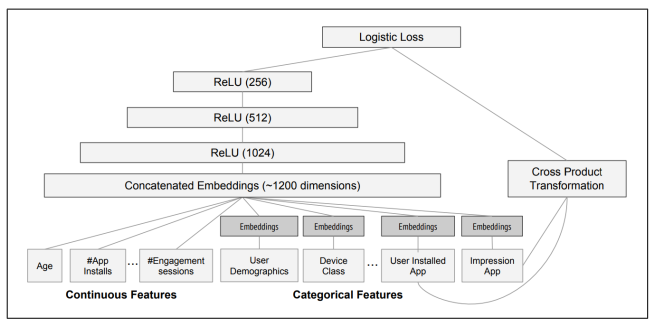

Here Googs combined the neural net approach and the dot product approach we did in the collaborative filtering section. 

## **Beyond Deep Learning (or rather prior to depending on how you look at it B)**

Most machine learning courses will throw dozens of different algorithms at you, with a brief technical description of the math behind them and maybe a toy example. You're left confused by the enormous range of techniques shown and have little practical understanding of how to apply them.

The good news is that modern machine learning can be distilled down to a couple of key techniques that are widely applicable. Recent studies have shown that the vast majority of datasets can be best modeled with just two methods:

1. Ensembles of decision trees (i.e., random forests and gradient boosting machines), mainly for structured data (such as you might find in a database table at most companies)
1. Multilayered neural networks learned with SGD (i.e., shallow and/or deep learning), mainly for unstructured data (such as audio, images, and natural language)

Although deep learning is nearly always clearly superior for unstructured data, these two approaches tend to give quite similar results for many kinds of structured data. But ensembles of decision trees tend to train faster, are often easier to interpret, do not require special GPU hardware for inference at scale, and often require less hyperparameter tuning. They have also been popular for quite a lot longer than deep learning, so there is a more mature ecosystem of tooling and documentation around them.

Most importantly, the critical step of interpreting a model of tabular data is significantly easier for decision tree ensembles. There are tools and methods for answering the pertinent questions, like: Which columns in the dataset were the most important for your predictions? How are they related to the dependent variable? How do they interact with each other? And which particular features were most important for some particular observation?

Therefore, ensembles of decision trees are our first approach for analyzing a new tabular dataset.

The exception to this guideline is when the dataset meets one of these conditions:

- There are some high-cardinality categorical variables that are very important ("cardinality" refers to the number of discrete levels representing categories, so a high-cardinality categorical variable is something like a zip code, which can take on thousands of possible levels).
- There are some columns that contain data that would be best understood with a neural network, such as plain text data.

In practice, when we deal with datasets that meet these exceptional conditions, we always try both decision tree ensembles and deep learning to see which works best. It is likely that deep learning will be a useful approach in our example of collaborative filtering, as we have at least two high-cardinality categorical variables: the users and the movies. But in practice things tend to be less cut-and-dried, and there will often be a mixture of high- and low-cardinality categorical variables and continuous variables.

Either way, it's clear that we are going to need to add decision tree ensembles to our modeling toolbox!

## **The Data**

Download the data from kaggle

In [ ]:
!kaggle competitions download -c bluebook-for-bulldozers

 52% 5.00M/9.59M [00:00<00:00, 9.89MB/s]
100% 9.59M/9.59M [00:00<00:00, 17.8MB/s]
  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 17.0MB/s]
  0% 0.00/297k [00:00<?, ?B/s]
100% 297k/297k [00:00<00:00, 91.4MB/s]
 53% 5.00M/9.38M [00:01<00:01, 3.42MB/s]
100% 9.38M/9.38M [00:01<00:00, 6.24MB/s]
  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 62.6MB/s]
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 28.5MB/s]
  0% 0.00/291k [00:00<?, ?B/s]
100% 291k/291k [00:00<00:00, 89.2MB/s]
  0% 0.00/209k [00:00<?, ?B/s]
100% 209k/209k [00:00<00:00, 64.0MB/s]
 71% 5.00M/7.06M [00:00<00:00, 17.8MB/s]
100% 7.06M/7.06M [00:00<00:00, 23.5MB/s]
 73% 5.00M/6.85M [00:00<00:00, 18.9MB/s]
100% 6.85M/6.85M [00:00<00:00, 22.8MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 104MB/s]
  0% 0.00/338k [00:00<?, ?B/s]
100% 338k/338k [00:00<00:00, 109MB/s]
100% 5.00M/5.01M [00:00<00:00, 11.5MB/s]
100% 5.01M/5.01M [00:00<00:00, 11.0MB/s]
 97% 9.00M/9.28M [00:00<00:00

Unzip it B

In [ ]:
!unzip /content/TrainAndValid.csv.zip

Archive:  /content/TrainAndValid.csv.zip
  inflating: TrainAndValid.csv       


Read it into a dataframe

In [ ]:
df = pd.read_csv('/content/TrainAndValid.csv', low_memory=False)

Kaggle provides information about some of the fields of our dataset. The [Data](https://www.kaggle.com/c/bluebook-for-bulldozers/data) explains that the key fields in *train.csv* are:

- `SalesID`:: The unique identifier of the sale.
- `MachineID`:: The unique identifier of a machine.  A machine can be sold multiple times.
- `saleprice`:: What the machine sold for at auction (only provided in *train.csv*).
- `saledate`:: The date of the sale.

List all the columns

In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

List the levels or categories of 'PructSize' variable:

In [ ]:
df['ProductSize'].unique()


array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

We can see that this is an ordinal variable so lets make it so:

In [ ]:
sizes = 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini' ,'Compact',  

In [ ]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

In [ ]:
df['ProductSize'].unique()

[NaN, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact']
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

Dependent variable is the most important variable it is what we want to be able to predict after all. Selecting a metric for our task is not always just a straighforward task, and it's an important part of the design process and it's important to pick a metric that makes sense for the task and that makes sense for the dependent variable, in this case we've been told which one to use tho, B.

In [ ]:
dep_var = 'SalePrice'

In [ ]:
df[dep_var] = np.log(df[dep_var])

## **Decision Trees, The 20 questions of ML**

A decision tree asks a series of binary questions about the data and produces a split after each question between the "yes" and "no" branch. After one or more questions, either a prediction can be made on the basis of all previous answers and we are at a leaf node or another question(s) is required and we're not at a leaf node. 

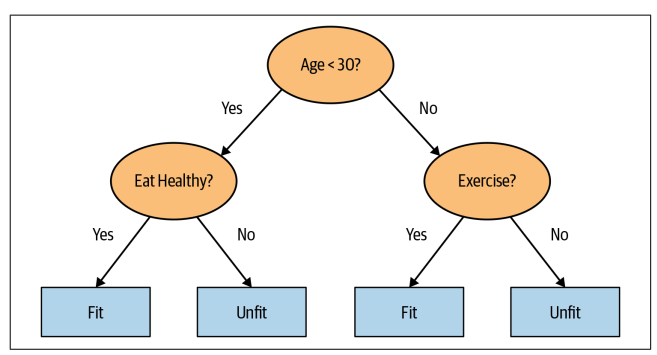

**Steps:**

1. Loop through each column of the dataset in turn.
2. For each column, loop through each possible level of that column in turn.
3. Try splitting the data into two groups, based on whether they are greater than or
less than that value (or if it is a categorical variable, based on whether they are
equal to or not equal to that level of that categorical variable).
4. Find the average sale price for each of those two groups, and see how close that is
to the actual sale price of each of the items of equipment in that group. Treat this
as a very simple “model” in which our predictions are simply the average sale
price of the item’s group.
5. After looping through all of the columns and all the possible levels for each, pick
the split point that gave the best predictions using that simple model.
6. We now have two groups for our data, based on this selected split. Treat each
group as a separate dataset, and find the best split for each by going back to step 1
for each group.
7. Continue this process recursively, until you have reached some stopping criterion
for each group—for instance, stop splitting a group further when it has only 20
items in it.

### **Handling Dates**

Dates are a bit different from most ordinal values in that some
dates are qualitatively different from others in a way that that is often relevant to the
systems we are modeling.

In [ ]:
df = add_datepart(df, 'saledate')

In [ ]:
!unzip /content/Test.csv.zip

Archive:  /content/Test.csv.zip
  inflating: Test.csv                


fastai has function `add_datepart` that takes dates and creates new variables for meaningful and potentially important dates:

In [ ]:
df_test = pd.read_csv('/content/Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')

In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In order to help our algorithm handle dates intelligently, we'd like our model to know more than whether a date is more recent or less recent than another. We might want our model to make decisions based on that date's day of the week, on whether a day is a holiday, on what month it is in, and so forth. To do this, we replace every date column with a set of date metadata columns, such as holiday, day of week, and month. These columns provide categorical data that we suspect will be useful.

In [ ]:
' '.join(o for o in df.columns if o.startswith('sale')) 

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

### **TabularPandas & TabularProc**

Let's do more datacleaning with TabularPandas & TabularProc, B:

Since sklearn can't handle string variables or missing variables we can use `TabularPandas` class to use two `TabularProcs`: `Categorify` our string variables and `FillMissing` our missing values:

`TabularProcs` is like a regular `Transform`, except that:

- It returns the exact same object that's passed to it, after modifying it in place.
- It runs the transform once, when data is first passed in, rather than lazily as the data is accessed. 


So `Categorify` is a `TabularProc` that replaces string columns with numerical categorical columns. 

And `FillMissing` is a `TabularProc` that replaces missing values with the median and adds a column with a binary variables whose values are set to true if the row had any missing values in it.

In [ ]:
procs = [Categorify, FillMissing]

Since we are working with time series and we want to predict saleprice at a future date we can't just use a randomly shuffled piece of the training set as our validation set. We want to preserve the temporal dimension in our prediction. So we make a condiction that selects all the data before October 2011 and define that for our training range. So the validation will be the data from after that time. 

In [ ]:
cond = (df.saleYear < 2011) | (df.saleYear < 10)

In [ ]:
cond.shape, np.where(cond)[0], np.where(~cond)[0]

((412698,),
 array([     0,      1,      2, ..., 392265, 392266, 392268]),
 array([     3,     35,     36, ..., 412695, 412696, 412697]))

In [ ]:
train_idx = np.where(cond)[0] #indexes for the training set
valid_idx = np.where(~cond)[0] # indexes for the validation set

splits = (list(train_idx), list(valid_idx)) # indexes for the training and validation sets

`cont_cat_split` is a helper function that goes through the dataset and tells `TabularPandas` which columns are continuous and which are categorical.

In [ ]:
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [ ]:
to = TabularPandas(df=df, procs=procs, cat_names=cat,cont_names=cont,y_names=dep_var, splits=splits)

A `TabularPandas` behaves a lot like `Datasets` object, including providing `train` and `valid` attributes (since we earlier passed it the `dep_var` being 'salePrice')

In [ ]:
len(to.train), len(to.valid)

(365928, 46770)

We can see that the data is still displayed as strings for categories:

In [ ]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [ ]:
to1 = TabularPandas(df, procs, ['state', 'ProductGroup', 'Drive_System', 'Enclosure'], [], y_names=dep_var, splits=splits)
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


`.items` shows how the data is stored internally as numbers kind of like SPSS when you decide to show as labels or not:

In [ ]:
to.items.head()

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1
4,1139253,9.305651,1057373,17311,...,1,1.248307e+09,1,1
5,1139255,10.184900,1001274,4605,...,1,1.229558e+09,1,1


In [ ]:
to1.items[['state', 'ProductGroup', 'Drive_System', 'Enclosure']].head()

,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6
4,32,3,0,1
5,3,1,2,6


In [ ]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [ ]:
#(path/'to.pkl').save(to)
#to = (path/'to.pkl').load()

### **Creating a Descision Tree B**

When we created the `TabularPanda` object we specified what are dependent variable was and by exclusion what our independent variables were, now lets define them as `xs`, `valid_xs` and `y`, `valid_y`.

In [ ]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

Since our data is now all numeric and we've filled in the missing values we can create a decision tree:
We create 2: one with 4 leaf nodes and one with 6

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m2 = DecisionTreeRegressor(max_leaf_nodes=6)
m.fit(xs, y), m2.fit(xs, y)

(DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'))

`draw_tree` lets us visualize our tree:

**Steps:**

1. Loop through each column of the dataset in turn.
2. For each column, loop through each possible level of that column in turn.
3. Try splitting the data into two groups, based on whether they are greater than or
less than that value (or if it is a categorical variable, based on whether they are
equal to or not equal to that level of that categorical variable).
4. Find the average sale price for each of those two groups, and see how close that is
to the actual sale price of each of the items of equipment in that group. Treat this
as a very simple “model” in which our predictions are simply the average sale
price of the item’s group.
5. After looping through all of the columns and all the possible levels for each, pick
the split point that gave the best predictions using that simple model.
6. We now have two groups for our data, based on this selected split. Treat each
group as a separate dataset, and find the best split for each by going back to step 1
for each group.
7. Continue this process recursively, until you have reached some stopping criterion
for each group—for instance, stop splitting a group further when it has only 20
items in it.

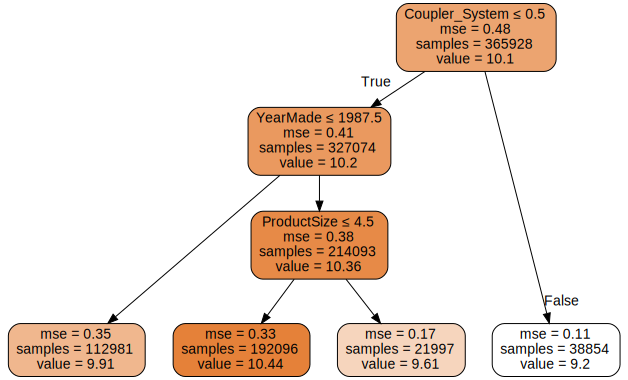

In [ ]:
draw_tree(m,xs, size=10, leaves_parallel=True, precision=2)

Starting from the top:

- The top node represents the *initial model* before any splits have been done, and when all the data is in one group. This is the simplest possible model, and is the result of asking zero "questions" of the data and will always predict just the average value of the whole dataset. In our case its predicting a value of 10.1 for the log of the sale price. It's giving us a mean squared error of 0.48, so the root meansquared error would be 0.69 (Remember that unless you see `m_rmse`, or a *root mean squared error*, then the value you are looking at is before taking the square root, so it is just the average of the square of the differences.) We can also see that our total sample size is 365928 of auction records. Lastly it shows the decision criterion for the best split that was found, which is to split based on the `coupler_system` column at a value of `<=0.5`.
- Moving down and to the left to the next node, shows us that there were 327074 samples for where `coupler_system` was less than or equal to 0.5 the average value of our target in this group is 10.21 with a MSE of 0.41. A second split is made here on the `YearMade` variable with values less than or equal to 1987.5. 
- Moving down and to right from the initial node brings us to a terminal leaf node were all the samples hade `coupler_system` values greater than 0.5
The bottom row contains our *leaf nodes*: the nodes with no answers coming out of them, because there are no more questions to be answered. At the far right of this row is the node containing records where `coupler_system` was greater than 0.5. The average value here is 9.21, so we can see the decision tree algorithm did find a single binary decision that separated high-value from low-value auction results. Asking only about `coupler_system` predicts an average value of 9.21 versus 10.1.




Returning back to the top node after the first decision point, we can see that a second binary decision split has been made, based on asking whether `YearMade` is less than or equal to 1987.5. For the group where this is true (remember, this is now following two binary decisions, based on `coupler_system` and `YearMade`) the average value is 9.91, and there are 112,981 samples in this group. For the group of auctions where this decision is false, the average value is 10.36, and there are 214,093 records. **So again, we can see that the decision tree algorithm has successfully split our more expensive auction records into two more groups which differ in value significantly.**

In [ ]:
#draw_tree(m2, xs, size=10, leaves_parallel=True, precision=2)

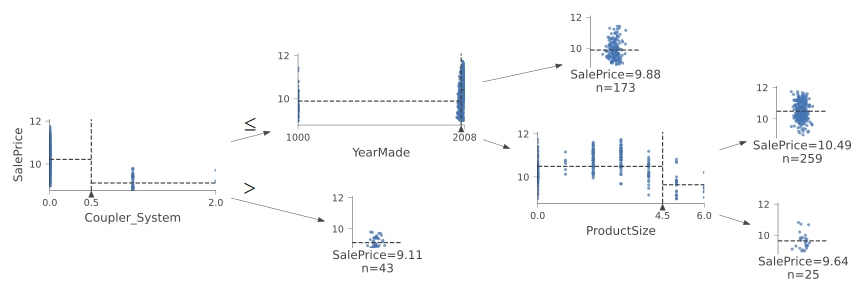

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
         fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
         orientation='LR')

This shows a chart of the distribution of the data for each split point. We can clearly see that there's a problem with our `YearMade` data: there are bulldozers made in the year 1000, apparently! Presumably this is actually just a missing value code (a value that doesn't otherwise appear in the data and that is used as a placeholder in cases where a value is missing). For modeling purposes, 1000 is fine, but as you can see this outlier makes visualization of the values we are interested in more difficult. So, let's replace it with 1950:

In [ ]:
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1950

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)

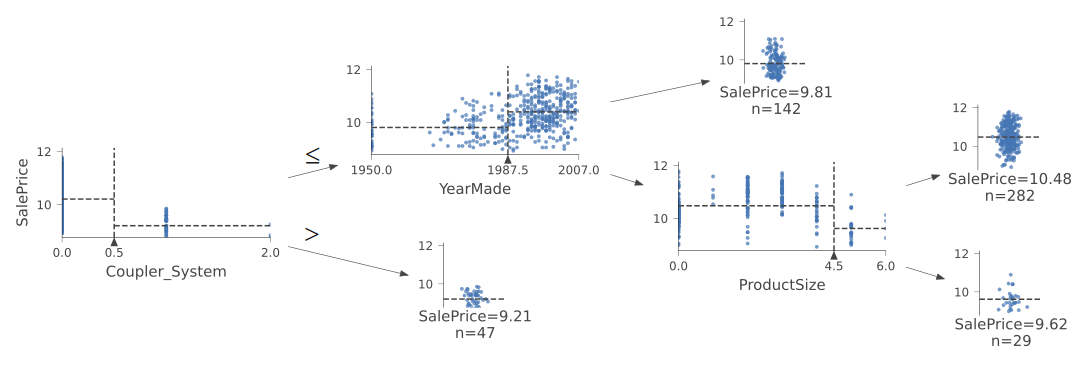

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
         fontname='DejaVu Sans', scale=2., label_fontsize=10,
         orientation='LR')

That change makes the split much clearer in the tree visualization, even although it doesn't actually change the result of the model in any significant way. This is a great example of how resilient decision trees are to data issues!

In [ ]:
m = DecisionTreeRegressor()
m.fit(xs,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs),y)

In [ ]:
m_rmse(m, xs, y)

1e-06

In [ ]:
m_rmse(m, valid_xs, valid_y)

0.388425

In [ ]:
m.get_n_leaves(), len(xs)

(296188, 365928)

Too many leaf nodes indeedy B

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.242864, 0.337655)

In [ ]:
m.get_n_leaves()

11199

### **Categorical Variables**

In the previous chapter, when working with deep learning networks, we dealt with categorical variables by one-hot encoding them and feeding them to an embedding layer. The embedding layer helped the model to discover the meaning of the different levels of these variables (the levels of a categorical variable do not have an intrinsic meaning, unless we manually specify an ordering using Pandas). In a decision tree, we don't have embeddings layers—so how can these untreated categorical variables do anything useful in a decision tree? For instance, how could something like a product code be used?

The short answer is: it just works! Think about a situation where there is one product code that is far more expensive at auction than any other one. In that case, any binary split will result in that one product code being in some group, and that group will be more expensive than the other group. Therefore, our simple decision tree building algorithm will choose that split. Later during training the algorithm will be able to further split the subgroup that contains the expensive product code, and over time, the tree will home in on that one expensive product.

It is also possible to use one-hot encoding to replace a single categorical variable with multiple one-hot-encoded columns, where each column represents a possible level of the variable. Pandas has a `get_dummies` method which does just that.

However, there is not really any evidence that such an approach improves the end result. So, we generally avoid it where possible, because it does end up making your dataset harder to work with. In 2019 this issue was explored in the paper ["Splitting on Categorical Predictors in Random Forests"](https://peerj.com/articles/6339/) by Marvin Wright and Inke König, which said:

> : The standard approach for nominal predictors is to consider all $2^{k-1} − 1$ 2-partitions of the *k* predictor categories. However, this exponential relationship produces a large number of potential splits to be evaluated, increasing computational complexity and restricting the possible number of categories in most implementations. For binary classification and regression, it was shown that ordering the predictor categories in each split leads to exactly the same splits as the standard approach. This reduces computational complexity because only *k* − 1 splits have to be considered for a nominal predictor with *k* categories.

Now that you understand how decisions tree work, it's time for the best-of-both-worlds solution: random forests.

## **Random Forests**

Bagging predictors is a method for generating multiple versions of a predictor and using these to get an aggregated predictor. The aggregation averages over the versions... The multiple versions are formed by making bootstrap replicates of the learning set and using these as new learning sets. Tests… show that bagging can give substantial gains in accuracy. The vital element is the instability of the prediction method. If perturbing the learning set can cause significant changes in the predictor constructed, then bagging can improve accuracy.

Here is the procedure that Breiman is proposing:

1. Randomly choose a subset of the rows of your data (i.e., "bootstrap replicates of your learning set").
1. Train a model using this subset.
1. Save that model, and then return to step 1 a few times.
1. This will give you a number of trained models. To make a prediction, predict using all of the models, and then take the average of each of those model's predictions.


`n_estimators` are the numbers of trees to use, `max_samples` defines how many rows to sample from for the training set and needs to be <= total number of rows. `max_features` defines how many columns to sample at each split point (where `0.5` means take half the total number of columns). `min_samples_leaf` specifys when to stop splitting three nodes. `n_jobs=-1` means use all cpu cores.

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
  return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                               max_samples=max_samples, max_features=max_features,
                               min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs,y)

This procedure is known as "bagging." It is based on a deep and important insight: although each of the models trained on a subset of data will make more errors than a model trained on the full dataset, those errors will not be correlated with each other. Different models will make different errors. The average of those errors, therefore, is: zero! So if we take the average of all of the models' predictions, then we should end up with a prediction that gets closer and closer to the correct answer, the more models we have. This is an extraordinary result—it means that we can improve the accuracy of nearly any kind of machine learning algorithm by training it multiple times, each time on a different random subset of the data, and averaging its predictions.

In [ ]:
m = rf(xs,y)

Out validation RMSE is now much better than 0.388425 which we got from using 1 decision tree on all the data.

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.167627, 0.253472)

One of the most important properties of random forests is that they aren't very sensitive to the hyperparameter choices, such as `max_features`. You can set `n_estimators` to as high a number as you have time to train—the more trees you have, the more accurate the model will be. `max_samples` can often be left at its default, unless you have over 200,000 data points, in which case setting it to 200,000 will make it train faster with little impact on accuracy. `max_features=0.5` and `min_samples_leaf=4` both tend to work well, although sklearn's defaults work well too.

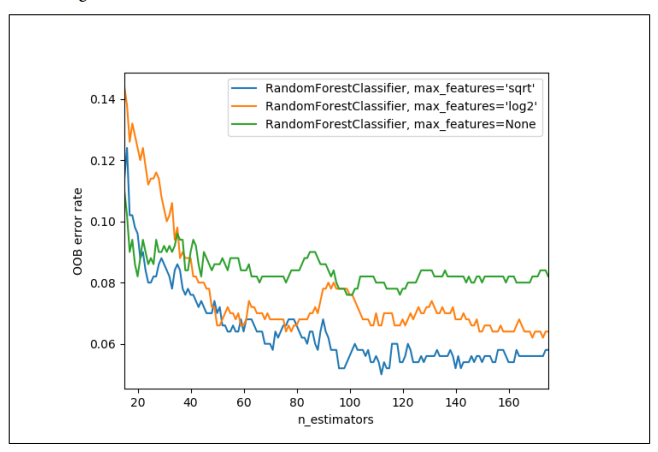

By using list comprehension we can get the prediction from each of the underlying decision trees in the random forest model. i.e. the `t` in `m_estimators_`

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [ ]:
preds.shape

(40, 46770)

`preds.mean(0)` gives the same result as out random forest:

In [ ]:
r_mse(preds.mean(0), valid_y)

0.253472

Plot all rows up to i+1 of RMSE of predictions with more and more trees:

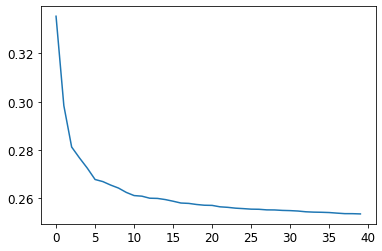

In [ ]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

### **Out-of-Bag Error**

OOB error is a way to measure prediction error on the traiing set by only including in the calculations of a row's error, trees where that entire row was not included in training. In effect this creates a bunch of mini validation sets and allows us to see whether the model is overfitting without needing a seperate validation set:

This is very useful when we have limited data and do not wish to partition of a chunk of it for a validation set yet we need to see whether our model can generalize well still.

The performance on our validation set is worse than on our training set. But is that because we're overfitting, or because the validation set covers a different time period, or a bit of both?

In [ ]:
r_mse(m.oob_prediction_,y)

0.210468

We can see here that our oob error is much lower than our validation error. What does that mean? If it was just due to overfitting than the oob error and the validation error would be similar. So this indicates that it's because we are trying to generalize to a different time period than we have trained for. (Note: OOB error gets calculated on every row of the data)

## **Model Inerpretation**

- **How confident are we in our predictions using a particular row of data?**
- **For predicting with a particular row of data, what were the most important factors, and how did they influence that prediction?**
- **Which columns are the strongest predictors, which can we ignore?**
- **Which columns are effectively redundant with each other, for purposes of prediction?**
- **How do predictions vary, as we vary these columns?**

### **Tree Variance for Prediction Confidence**

- **How confident are we in our predictions using a particular row of data?**


We can grab all of the predictions of all the trees using list comprehension but instead of calculating the mean lets calculate the standard deviation to find out how much the trees varied between every row:

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [ ]:
preds.shape

(40, 46770)

In [ ]:
preds_std = preds.std(0)

In [ ]:
preds_std.shape

(46770,)

We can see that the std vary a lot between trees, a low standard deviation indicates a high relative confidence between the trees and the mean of all the predictions, while a high one indicates the opposite and make indicate weakness in the prediction of that particular tree. 

In [ ]:
preds_std[:20]

array([0.27499878, 0.31668416, 0.17630175, 0.21393429, 0.28085949, 0.19159883, 0.22008486, 0.33808795, 0.13959648, 0.14194518, 0.35945068, 0.20253714, 0.08949796, 0.1143643 , 0.14775684, 0.12767346,
       0.16190822, 0.23602217, 0.36395205, 0.25475965])

### **Feature Importance**

**Which columns are the strongest predictors, which can we ignore?**


Feature importance gives us insight into how our model is making predictions and what features are contributing the most to said predictions:

In [ ]:
def rf_feat_importance(m, df):
  return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

Here we can see that `YearMade` and `ProductSize` are the main preditors of `salePrice` which makes sense as later models would tend to be more expensive the same would go for bulldozers of larger size:


In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.179114
6,ProductSize,0.119301
30,Coupler_System,0.090908
31,Grouser_Tracks,0.090093
7,fiProductClassDesc,0.071240
54,ModelID,0.054422
65,saleElapsed,0.052296
3,fiSecondaryDesc,0.044453
1,fiModelDesc,0.030831
52,SalesID,0.028674


In [ ]:
def plot_fi(fi):
  return fi.plot('cols', 'imp', 'barh', figsize=(10,10), legend=False)

We can plot the feature importance:

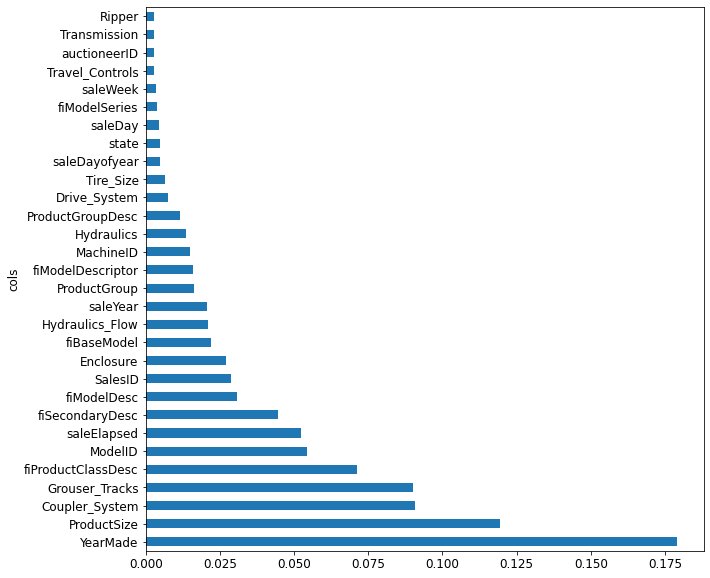

In [ ]:
plot_fi(fi[:30])

Feature importance is calculated by the algorithm looping through each tree, and then recursively exploring each branch. At each branch, it looks to see what feature was used for that split, and how much the model imporved as a result of the split. The improvement (weighted by the number of rows in that group) is added to the importance score for that feature. All of these are summed across all branches of all trees, and then the scores are normalized so that the add up to 1.

### **Removing Low-Importance Variables**

We want our model to be as simple as possible so if we can remove redundant features without affecting the overall accuracy or even improving it we should do that. In addition a simpler model works better in production as it can be easier to explain to decision makers.

Thus we drop features with low scores on the feature importance:

In [ ]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

Index them by assigning the names to `to_keep` then Retrain using the `to_keep` columns

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
xs.shape, xs_imp.shape

((365928, 66), (365928, 21))

In [ ]:
m = rf(xs_imp, y)

In [ ]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.178417, 0.253452)

Are accuracy seems to be largely unaffected by the change in number of columns from 66 to 21

In [ ]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

Dropping columns also makes feature importance plot easier to interpret:


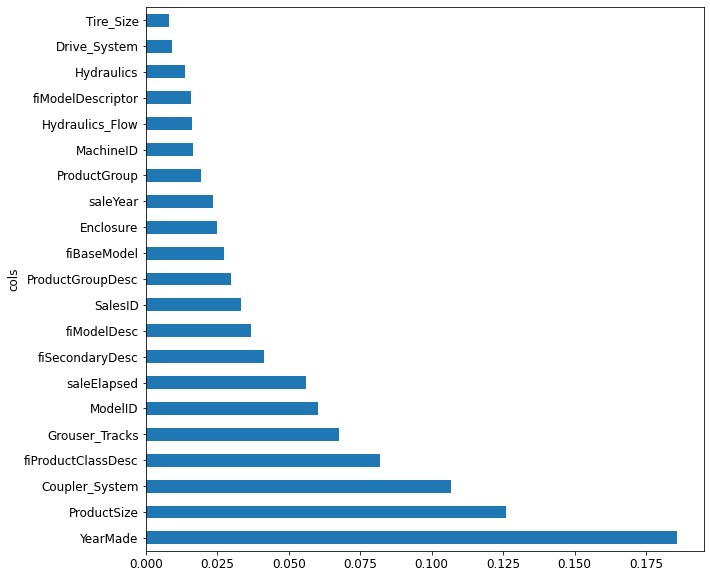

In [ ]:
plot_fi(rf_feat_importance(m, xs_imp))

It does seem that we have some redundant features i.e features that are measuring the same thing!

### **Removing Redundant Features**

- **Which columns are effectively redundant with each other, for purposes of prediction?**

Rank correlations of columns:

In this plot the features that are most similar were merged together early and far from the root of the tree going from right to left.

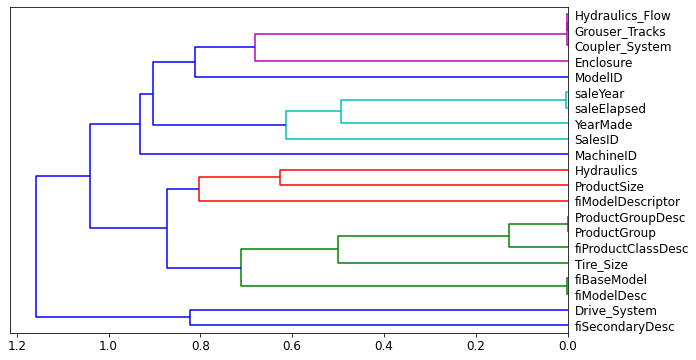

In [ ]:
cluster_columns(xs_imp)

If, for example, one variable is the identity of a college basketball program and another variable is the identity of a college football program, one could test for a relationship between the poll rankings of the two types of program: do colleges with a higher-ranked basketball program tend to have a higher-ranked football program? A rank correlation coefficient can measure that relationship, and the measure of significance of the rank correlation coefficient can show whether the measured relationship is small enough to likely be a coincidence.

If there is only one variable, the identity of a college football program, but it is subject to two different poll rankings (say, one by coaches and one by sportswriters), then the similarity of the two different polls' rankings can be measured with a rank correlation coefficient.

a rank correlation is any of several statistics that measure an ordinal association—the relationship between rankings of different ordinal variables or different rankings of the same variable, where a "ranking" is the assignment of the ordering labels "first", "second", "third", etc. to different observations of a particular variable. A rank correlation coefficient measures the degree of similarity between two rankings, and can be used to assess the significance of the relation between them.

This same logic extends to feature importance between different features as shown in the plot above!

Lets try removing some of the correlated features and get the oob score to see how it affect our accuracy:

In [ ]:
def get_oob(df):
  m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,max_samples=50000,
                            max_features=0.5, n_jobs=-1, oob_score=True)
  m.fit(df,y)
  return m.oob_score_

We create a function that quickly trains a rf model and return the OOB scare. By using a lowe `max_samples` and higher `min_sample_leaf` we can train our model quicker. The OOB score returned ranges from 1.0 for a perfect model to 0.0 for a random model.(this is called the R^2 score in stats)

This is our baseline:

In [ ]:
get_oob(xs_imp)

0.8771129517380286

In [ ]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc', 'ProductGroup',
    'fiModelDesc', 'fiBaseModel', 'Hydraulics_Flow', 'Grouser_Tracks',
    'Coupler_System'
)}

{'Coupler_System': 0.8777592770697827,
 'Grouser_Tracks': 0.8772723351189322,
 'Hydraulics_Flow': 0.8777646146346767,
 'ProductGroup': 0.8779905944900402,
 'ProductGroupDesc': 0.8775062504426951,
 'fiBaseModel': 0.8763295775385989,
 'fiModelDesc': 0.8765132440267179,
 'saleElapsed': 0.87260643530446,
 'saleYear': 0.8766396878470781}

In [ ]:
to_drop = ['saleYear', 'ProductGroup', 'fiBaseModel', 'Hydraulics_Flow']
get_oob(xs_imp.drop(to_drop, axis=1)) #drop the to_drop columns (axis=1)

0.8743110693674909

**NOTE: WHEN DOING THE ABOVE WITH A NON LIMITED RF MODEL WE GET SLIGHTLY DIFFERENT RESULTS EVEN THOUGH TRAINING TAKES LONGER, WHICH ULTIMATELY LEADS TO A MARGINALLY MORE ACCURATE MODEL**

Cool lets now create `DataFrames` with our new and improved and leaned down data set both for training and validation B:

In [ ]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [ ]:
#xs_final = load_pickle(path/'xs_final.pkl')
#valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

In [ ]:
m = rf(xs_final, y)

In [ ]:
m_rmse(m, xs_final, y)

0.180343

In [ ]:
xs_final.shape, valid_xs_final.shape

((365928, 17), (46770, 17))

In [ ]:
m_rmse(m, valid_xs_final, valid_y)

0.256024

BY FOCUSING ON THE MOST IMPORTANT VARIABLES, AND REMOVING SOME REDUNDANT ONES, WE'VE GREATLY SIMPLIDIEF OUR MODEL.

### **Partial Dependence**

- **How do predictions vary, as we vary these columns?**

In [ ]:
fi = rf_feat_importance(m, xs_final)
fi[:10]

,cols,imp
0,YearMade,0.178068
1,ProductSize,0.119749
2,Coupler_System,0.118950
4,fiProductClassDesc,0.081378
6,saleElapsed,0.075011
5,ModelID,0.062523
3,Grouser_Tracks,0.059119
10,Enclosure,0.056753
7,fiSecondaryDesc,0.050708
8,fiModelDesc,0.047718


First lets call pandas `value_counts` to see how many levels we have in our variables:

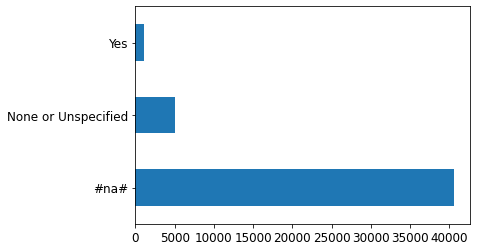

In [ ]:
p = valid_xs_final['Coupler_System'].value_counts(sort=False).plot.barh()
c = to.classes['Coupler_System']
plt.yticks(range(len(c)), c);

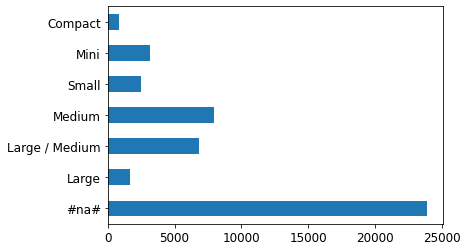

In [ ]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

The largest group of value for our top 2 predictors is na i.e missing values this could be problematic especially if partial dependency plot indicates that this level is important.

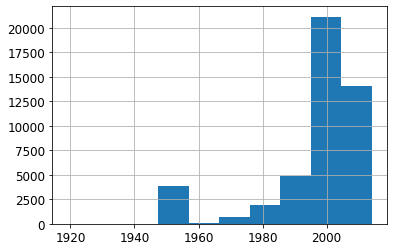

In [ ]:
ax = valid_xs_final['YearMade'].hist()

Instead, what we do is replace every single value in the YearMade column with 1950, and then calculate the predicted sale price for every auction, and take the average over all auctions. Then we do the same for 1951, 1952, and so forth until our final year of 2011. This isolates the effect of only YearMade (even if it does so by averaging over some imagined records where we assign a YearMade value that might never actually exist alongside some other values).

With these averages, we can then plot each of these years on the x-axis, and each of the predictions on the y-axis. This, finally, is a partial dependence plot. Let's take a look:

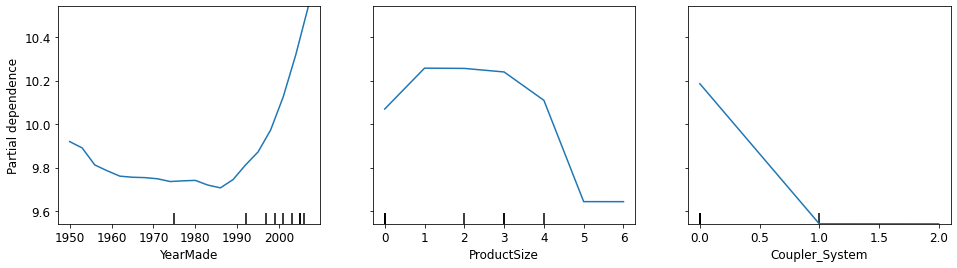

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(figsize=(16,4))
plot_partial_dependence(m, valid_xs_final, ['YearMade', 'ProductSize','Coupler_System'], grid_resolution=20, ax=ax)

In the graphs above we can see that the lowest value of predicted sale price for `ProductSize` and `Coupler_System` are for missing variables. Now this can be problemetatic and warrents further investigation into why this is the case in that why is it missing so often and what that means when these are missing. Missing values can sometimes be useful predictors if the cause of them being missing is determined and deemed relavant. However sometimes they can indicare data leakage:

### **Data Leakage**


In  the paper ["Leakage in Data Mining: Formulation, Detection, and Avoidance"](https://dl.acm.org/doi/10.1145/2020408.2020496), Shachar Kaufman, Saharon Rosset, and Claudia Perlich describe leakage as: 

> **The introduction of information about the target of a data mining problem, which should not be legitimately available to mine from. A trivial example of leakage would be a model that uses the target itself as an input, thus concluding for example that 'it rains on rainy days'. In practice, the introduction of this illegitimate information is unintentional, and facilitated by the data collection, aggregation and preparation process.**

They give as an example:

> : A real-life business intelligence project at IBM where potential customers for certain products were identified, among other things, based on keywords found on their websites. This turned out to be leakage since the website content used for training had been sampled at the point in time where the potential customer has already become a customer, and where the website contained traces of the IBM products purchased, such as the word 'Websphere' (e.g., in a press release about the purchase or a specific product feature the client uses).

Data leakage is subtle and can take many forms. In particular, missing values often represent data leakage.

For instance, Jeremy competed in a Kaggle competition designed to predict which researchers would end up receiving research grants. The information was provided by a university and included thousands of examples of research projects, along with information about the researchers involved and data on whether or not each grant was eventually accepted. The university hoped to be able to use the models developed in this competition to rank which grant applications were most likely to succeed, so it could prioritize its processing.

Jeremy used a random forest to model the data, and then used feature importance to find out which features were most predictive. He noticed three surprising things:

- The model was able to correctly predict who would receive grants over 95% of the time.
- Apparently meaningless identifier columns were the most important predictors.
- The day of week and day of year columns were also highly predictive; for instance, the vast majority of grant applications dated on a Sunday were accepted, and many accepted grant applications were dated on January 1.

**For the identifier columns, one partial dependence plot per column showed that when the information was missing the application was almost always rejected. It turned out that in practice, the university only filled out much of this information *after* a grant application was accepted. Often, for applications that were not accepted, it was just left blank. Therefore, this information was not something that was actually available at the time that the application was received, and it would not be available for a predictive model—it was data leakage.**

**In the same way, the final processing of successful applications was often done automatically as a batch at the end of the week, or the end of the year. It was this final processing date which ended up in the data, so again, this information, while predictive, was not actually available at the time that the application was received.**

This example showcases the most practical and simple approaches to identifying data leakage, which are to build a model and then:

- Check whether the accuracy of the model is *too good to be true*.
- Look for important predictors that don't make sense in practice.
- Look for partial dependence plot results that don't make sense in practice.

**Thinking back to our bear detector, this mirrors the advice that we provided in it is often a good idea to build a model first and then do your data cleaning, rather than vice versa. The model can help you identify potentially problematic data issues.**

It can also help you identify which factors influence specific predictions, with tree interpreters.

### **Tree Interpreter**

- **For predicting with a particular row of data, what were the most important factors, and how did they influence that prediction?**

We can do exactly the same thing, but for just a single row of data. For instance, let's say we are looking at some particular item at auction. Our model might predict that this item will be very expensive, and we want to know why. So, we take that one row of data and put it through the first decision tree, looking to see what split is used at each point throughout the tree. For each split, we see what the increase or decrease in the addition is, compared to the parent node of the tree. We do this for every tree, and add up the total change in importance by split variable.

For instance, let's pick the first few rows of our validation set:

In [ ]:
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

Take out 5 first rows:

In [ ]:
row = valid_xs_final.iloc[:5]
row.shape, valid_xs_final.shape

((5, 17), (46770, 17))

In [ ]:
row.values.shape

(5, 17)

In [ ]:
prediction, bias, contributions = treeinterpreter.predict(m, row.values)

In [ ]:
prediction.shape, bias.shape, contributions.shape

((5, 1), (5,), (5, 17))

`prediction` is simply the prediction that the random forest makes. `bias` is the prediction based on taking the mean of the dependent variable (i.e., the *model* that is the root of every tree). `contributions` is the most interesting bit—it tells us the total change in predicition due to each of the independent variables. Therefore, the sum of `contributions` plus `bias` must equal the `prediction`, for each row. Let's look just at the first row:

In [ ]:
prediction[0], bias[0], contributions[0].sum()

(array([10.12959101]), 10.095637633158443, 0.0339533817230533)

Plot the contributions of the features for the prediction of the first row of the validation data:

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

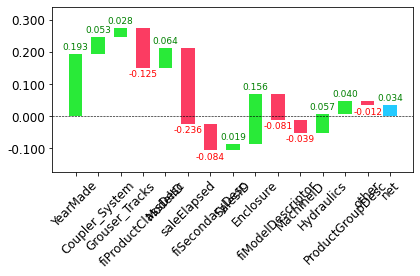

In [ ]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08,
          rotation_value=45, formatting='{:,.3f}')

This kind of information is most useful in production, rather than during model development. You can use it to provide useful information to users of your data product about the underlying reasoning behind the predictions.

## **Extrapolation and Neural Networks**

Random Forests have trouble extrapolating B

### **The Extrapolation Problem**

In [ ]:
np.random.seed(42)

Lets create some linearly spaced toy data:

In [ ]:
x_lin = torch.linspace(0, 20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
x_lin.shape, y_lin.shape

(torch.Size([40]), torch.Size([40]))

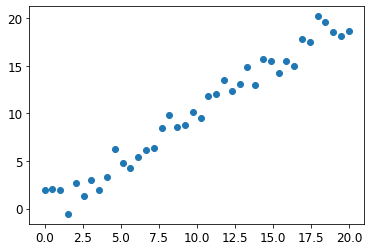

In [ ]:
plt.scatter(x_lin, y_lin)

Add a dimension to it with `unsqueeze(1)` talmbout sklearn except matrix of independent variables and not a single vector as input:

In [ ]:
xs_lin = x_lin.unsqueeze(1)
xs_lin.shape

torch.Size([40, 1])

In [ ]:
x_lin[:, None].shape

torch.Size([40, 1])

In [ ]:
m_lin = RandomForestRegressor().fit(xs_lin[:30], y_lin[:30])

Blue dots are all the training data and the red dots are the predictions

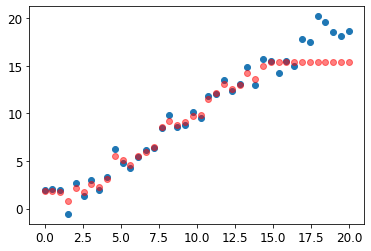

In [ ]:
plt.scatter(x_lin, y_lin)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5)

Since random forest just averages the prediction of a number of trees. And a tree simply predicts the average value of the rows in a leaf, A random forest will never be able to predict values outside of the range of the training data. **Thus they become problematic to use for data where there is a trend over time, and you wish to make predictions into the future**

But the problem extends beyond time variables. Random forests are not able to extrapolate outside of the types of data they have seen, in a more general sense. That's why we need to make sure our validation set does not contain out-of-domain data.

### **Out of Domain Data**

Sometimes it is hard to know whether your test set is distributed in the same way as your training data, or, if it is different, what columns reflect that difference. There's actually an easy way to figure this out, which is to use a random forest!

HOWEVER WE DON'T USE RANDOM FOREST TO PREDICT OUR ACTUAL DEPENDENT VARIABLE. INSTEAD, WE TRY TO PREDICT WHETHER A ROW IS IN THE VALIDATION SER OR THE TRAINING SET:

We concatenate the training and validation set, then we create a binary variable that is 1 for every row of the validation set and 0 for every row of the training set. If all of the data was from the training set then none of the features would be important or predictive as we are trying to identify rows that are different from the training set and only occur in the validation set. 

In [ ]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))
is_valid.shape, xs_final.shape, valid_xs_final.shape

((412698,), (365928, 17), (46770, 17))

In [ ]:
m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
6,saleElapsed,0.804073
9,SalesID,0.162822
12,MachineID,0.023192
0,YearMade,0.008312
10,Enclosure,0.000940
4,fiProductClassDesc,0.000230


This shows that `saleElapsed`, `SalesID` and `MachineID` differ from our training and validation set, which makes sense since theres a temporal component to these variables. Thus lets remove these and retrain our model so we don't have to deal with out of domain data probs b.

In [ ]:
is_train_df = pd.DataFrame(xs_final)
is_train = np.array([0]*len(xs_final))
m_test = rf(is_train_df, is_train)
rf_feat_importance(m_test,is_train_df)[:6]

,cols,imp
0,YearMade,0.0
9,SalesID,0.0
15,Drive_System,0.0
14,ProductGroupDesc,0.0
13,Hydraulics,0.0
12,MachineID,0.0


In [ ]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID','saleElapsed', 'MachineID'):
  m = rf(xs_final.drop(c, axis=1), y)
  print(c, m_rmse(m, valid_xs_final.drop(c, axis=1), valid_y))

orig 0.255383
SalesID 0.25227
saleElapsed 0.271205
MachineID 0.252173


Looks like we should be able to remove `SalesID` and `MachineID` without loosing any accuracy

In [ ]:
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.249171

Removing those two variables lowered our loss and improved our accuracy:
but more importantly, it should make it more resilient over time, and easier to maintain and understand. We recommend that for all datasets you try building a model where your dependent variable is `is_valid`, like we did here. It can often uncover subtle *domain shift* issues that you may otherwise miss.

One thing that might help in our case is to simply avoid using old data. Often, old data shows relationships that just aren't valid any more. Let's try just using the most recent few years of the data:

In [ ]:
xs['saleYear'].hist()

In [ ]:
filt = xs['saleYear']>2000
xs_filt = xs_final_time[filt]
y_filt = y[filt]
xs_filt.shape, y_filt.shape

((261335, 15), (261335,))

In [ ]:
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.180278, 0.248416)

### **Using a Neural Network**

Let's try using a neural network instead B

In [ ]:
df_nn = pd.read_csv('/content/TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

In [ ]:
df_nn.columns

We can leverage the work we did with feature selection using our rf and use that dataset for our neural net

In [ ]:
xs_final_time.columns

In [ ]:
sale_year = 'saleYear'

In [ ]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var] + [sale_year]]

In [ ]:
df_nn_final.columns

Index(['YearMade', 'ProductSize', 'Coupler_System', 'Grouser_Tracks',
       'fiProductClassDesc', 'ModelID', 'saleElapsed', 'fiSecondaryDesc',
       'fiModelDesc', 'Enclosure', 'fiModelDescriptor', 'Hydraulics',
       'ProductGroupDesc', 'Drive_System', 'Tire_Size', 'SalePrice',
       'saleYear'],
      dtype='object')

In [ ]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [ ]:
cont_nn, cat_nn

(['saleElapsed'],
 ['YearMade',
  'ProductSize',
  'Coupler_System',
  'Grouser_Tracks',
  'fiProductClassDesc',
  'ModelID',
  'fiSecondaryDesc',
  'fiModelDesc',
  'Enclosure',
  'fiModelDescriptor',
  'Hydraulics',
  'ProductGroupDesc',
  'Drive_System',
  'Tire_Size',
  'saleYear'])

In [ ]:
cont_nn.append('saleElapsed')
#cat_nn.remove('saleYear')

In [ ]:
df_nn_final.columns

Index(['YearMade', 'ProductSize', 'Coupler_System', 'Grouser_Tracks',
       'fiProductClassDesc', 'ModelID', 'saleElapsed', 'fiSecondaryDesc',
       'fiModelDesc', 'Enclosure', 'fiModelDescriptor', 'Hydraulics',
       'ProductGroupDesc', 'Drive_System', 'Tire_Size', 'SalePrice',
       'saleYear'],
      dtype='object')

In [ ]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
Grouser_Tracks           2
fiProductClassDesc      74
ModelID               5281
fiSecondaryDesc        177
fiModelDesc           5059
Enclosure                6
fiModelDescriptor      140
Hydraulics              12
ProductGroupDesc         6
Drive_System             4
Tire_Size               17
saleYear                24
dtype: int64

In [ ]:
xs_filt2 = xs_filt.drop('fiModelDesc', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDesc', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.182871, 0.252803)

In [ ]:
cond = (df_nn_final.saleYear < 2011) | (df_nn_final.saleYear < 10)

In [ ]:
cond.shape, np.where(cond)[0], np.where(~cond)[0]

In [ ]:
train_idx = np.where(cond)[0] #indexes for the training set
valid_idx = np.where(~cond)[0] # indexes for the validation set

splits = (list(train_idx), list(valid_idx)) # indexes for the training and validation sets

In [ ]:
cat_nn.remove('fiModelDesc')

In [ ]:
df_nn_final.columns

Index(['YearMade', 'ProductSize', 'Coupler_System', 'Grouser_Tracks',
       'fiProductClassDesc', 'ModelID', 'saleElapsed', 'fiSecondaryDesc',
       'fiModelDesc', 'Enclosure', 'fiModelDescriptor', 'Hydraulics',
       'ProductGroupDesc', 'Drive_System', 'Tire_Size', 'SalePrice',
       'saleYear'],
      dtype='object')

In [ ]:
df_nn_final.iloc[:,16]

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [ ]:
cont_nn.remove('saleElapsed')

In [ ]:
df_nn_final.dtypes

YearMade                 int64
ProductSize           category
Coupler_System          object
Grouser_Tracks          object
fiProductClassDesc      object
ModelID                  int64
saleElapsed            float64
fiSecondaryDesc         object
fiModelDesc             object
Enclosure               object
fiModelDescriptor       object
Hydraulics              object
ProductGroupDesc        object
Drive_System            object
Tire_Size               object
SalePrice              float64
saleYear                 int64
dtype: object

We can create our `TabularPandas` object in the same way as when we created our random forest, with one very important addition: normalization. A random forest does not need any normalization—the tree building procedure cares only about the order of values in a variable, not at all about how they are scaled. But as we have seen, a neural network definitely does care about this. Therefore, we add the `Normalize` processor when we build our `TabularPandas` object:

In [ ]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)



We can use alarge batch size since we're dealing with tabular data:

In [ ]:
dls = to_nn.dataloaders(1024)

Find the range of our dependent variable so that we can sey `y_range`

In [ ]:
y = to_nn.train.y
y.min(), y.max()

(8.465899467468262, 11.863582611083984)

Create a `tabular_learner` with the `y_range` and with 2 hidden layers with 500 and 250 activations respectively:

In [ ]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,0.059176,0.137237,00:36
1,0.051445,0.164282,00:35
2,0.046518,0.111299,00:35
3,0.042126,0.136952,00:34
4,0.038769,0.132644,00:34


In [ ]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

In [ ]:
learn.save('nn')

### **Tabular Classes B**


In fastai, a tabular model is simply a model that takes columns of continuous or categorical data, and predicts a category (a classification model) or a continuous value (a regression model). Categorical independent variables are passed through an embedding, and concatenated, as we saw in the neural net we used for collaborative filtering, and then continuous variables are concatenated as well.

The model created in `tabular_learner` is an object of class `TabularModel`. Take a look at the source for `tabular_learner` now (remember, that's `tabular_learner??` in Jupyter). You'll see that like `collab_learner`, it first calls `get_emb_sz` to calculate appropriate embedding sizes (you can override these by using the `emb_szs` parameter, which is a dictionary containing any column names you want to set sizes for manually), and it sets a few other defaults. Other than that, it just creates the `TabularModel`, and passes that to `TabularLearner` (note that `TabularLearner` is identical to `Learner`, except for a customized `predict` method).

That means that really all the work is happening in `TabularModel`, so take a look at the source for that now. With the exception of the `BatchNorm1d` and `Dropout` layers (which we'll be learning about shortly), you now have the knowledge required to understand this whole class. Take a look at the discussion of `EmbeddingNN` at the end of the last chapter. Recall that it passed `n_cont=0` to `TabularModel`. We now can see why that was: because there are zero continuous variables (in fastai the `n_` prefix means "number of," and `cont` is an abbreviation for "continuous").

In [ ]:
TabularModel??

### **Combining Embeddings with Other Methods**

Think back to the original reasoning behind why random forests work so well: each tree has errors, but those errors are not correlated with each other, so the average of those errors should tend towards zero once there are enough trees. Similar reasoning could be used to consider averaging the predictions of models trained using different algorithms.

In our case, we have two very different models, trained using very different algorithms: a random forest, and a neural network. It would be reasonable to expect that the kinds of errors that each one makes would be quite different. Therefore, we might expect that the average of their predictions would be better than either one's individual predictions.

As we saw earlier, a random forest is itself an ensemble. But we can then include a random forest in *another* ensemble—an ensemble of the random forest and the neural network! While ensembling won't make the difference between a successful and an unsuccessful modeling process, it can certainly add a nice little boost to any models that you have built.

One minor issue we have to be aware of is that our PyTorch model and our sklearn model create data of different types: PyTorch gives us a rank-2 tensor (i.e, a column matrix), whereas NumPy gives us a rank-1 array (a vector). `squeeze` removes any unit axes from a tensor, and `to_np` converts it into a NumPy array:

In [ ]:
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

This gives us a better result than either model achieved on its own:

In [ ]:
r_mse(ens_preds,valid_y)

In fact, this result is better than any score shown on the Kaggle leaderboard. It's not directly comparable, however, because the Kaggle leaderboard uses a separate dataset that we do not have access to. Kaggle does not allow us to submit to this old competition to find out how we would have done, but our results certainly look very encouraging!

### Boosting

So far our approach to ensembling has been to use *bagging*, which involves combining many models (each trained on a different data subset) together by averaging them. As we saw, when this is applied to decision trees, this is called a *random forest*.

There is another important approach to ensembling, called *boosting*, where we add models instead of averaging them. Here is how boosting works:

- Train a small model that underfits your dataset.
- Calculate the predictions in the training set for this model.
- Subtract the predictions from the targets; these are called the "residuals" and represent the error for each point in the training set.
- Go back to step 1, but instead of using the original targets, use the residuals as the targets for the training.
- Continue doing this until you reach some stopping criterion, such as a maximum number of trees, or you observe your validation set error getting worse.

Using this approach, each new tree will be attempting to fit the error of all of the previous trees combined. Because we are continually creating new residuals, by subtracting the predictions of each new tree from the residuals from the previous tree, the residuals will get smaller and smaller.

To make predictions with an ensemble of boosted trees, we calculate the predictions from each tree, and then add them all together. There are many models following this basic approach, and many names for the same models. *Gradient boosting machines* (GBMs) and *gradient boosted decision trees* (GBDTs) are the terms you're most likely to come across, or you may see the names of specific libraries implementing these; at the time of writing, *XGBoost* is the most popular.

Note that, unlike with random forests, with this approach there is nothing to stop us from overfitting. Using more trees in a random forest does not lead to overfitting, because each tree is independent of the others. But in a boosted ensemble, the more trees you have, the better the training error becomes, and eventually you will see overfitting on the validation set.

We are not going to go into detail on how to train a gradient boosted tree ensemble here, because the field is moving rapidly, and any guidance we give will almost certainly be outdated by the time you read this. As we write this, sklearn has just added a `HistGradientBoostingRegressor` class that provides excellent performance. There are many hyperparameters to tweak for this class, and for all gradient boosted tree methods we have seen. Unlike random forests, gradient boosted trees are extremely sensitive to the choices of these hyperparameters; in practice, most people use a loop that tries a range of different hyperparameters to find the ones that work best.

## **Ensembling**

The abstract of the entity embedding paper we mentioned at the start of this chapter states: "the embeddings obtained from the trained neural network boost the performance of all tested machine learning methods considerably when used as the input features instead". It includes the very interesting table in <<embedding_mixed>>.

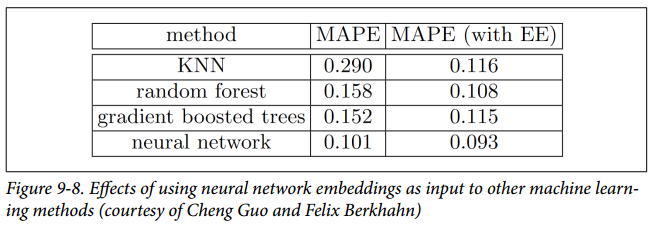

This is showing the mean average percent error (MAPE) compared among four different modeling techniques, three of which we have already seen, along with *k*-nearest neighbors (KNN), which is a very simple baseline method. The first numeric column contains the results of using the methods on the data provided in the competition; the second column shows what happens if you first train a neural network with categorical embeddings, and then use those categorical embeddings instead of the raw categorical columns in the model. As you see, in every case, the models are dramatically improved by using the embeddings instead of the raw categories.

This is a really important result, because it shows that you can get much of the performance improvement of a neural network without actually having to use a neural network at inference time. You could just use an embedding, which is literally just an array lookup, along with a small decision tree ensemble.

These embeddings need not even be necessarily learned separately for each model or task in an organization. Instead, once a set of embeddings are learned for some column for some task, they could be stored in a central place, and reused across multiple models. In fact, we know from private communication with other practitioners at large companies that this is already happening in many places.

## Conclusion: Our Advice for Tabular Modeling

We have dicussed two approaches to tabular modeling: decision tree ensembles and neural networks. We've also mentioned two different decision tree ensembles: random forests, and gradient boosting machines. Each is very effective, but each also has compromises:

- *Random forests* are the easiest to train, because they are extremely resilient to hyperparameter choices and require very little preprocessing. They are very fast to train, and should not overfit if you have enough trees. But they can be a little less accurate, especially if extrapolation is required, such as predicting future time periods.

- *Gradient boosting machines* in theory are just as fast to train as random forests, but in practice you will have to try lots of different hyperparameters. They can overfit, but they are often a little more accurate than random forests.

- *Neural networks* take the longest time to train, and require extra preprocessing, such as normalization; this normalization needs to be used at inference time as well. They can provide great results and extrapolate well, but only if you are careful with your hyperparameters and take care to avoid overfitting.

We suggest starting your analysis with a random forest. This will give you a strong baseline, and you can be confident that it's a reasonable starting point. You can then use that model for feature selection and partial dependence analysis, to get a better understanding of your data.

From that foundation, you can try neural nets and GBMs, and if they give you significantly better results on your validation set in a reasonable amount of time, you can use them. If decision tree ensembles are working well for you, try adding the embeddings for the categorical variables to the data, and see if that helps your decision trees learn better.

## **Summary**

## Questionnaire

1. What is a continuous variable?

- Continuous variables are non discrete numeric variables like age and height. They can be directly fed to the model and you can add and multiply them.

2. What is a categorical variable?

- Categorical variables are variables with a set of discrete levels or categories aka nominal variables. They cannot be fed directly to the model since adding and multiplying them is meaningless.

3. Provide two of the words that are used for the possible values of a categorical variable.

- categories and levels?

4. What is a "dense layer"?

- A dense layer is a term that means the same as linear layer. 

5. How do entity embeddings reduce memory usage and speed up neural networks?

- They turn categorical variables into being continuous 

6. What kinds of datasets are entity embeddings especially useful for?

- Datasets were we have a mixture of continuous and categorical variables.

7. What are the two main families of machine learning algorithms?



8. Why do some categorical columns need a special ordering in their classes? How do you do this in Pandas?

- Because they're ordinal variables were the order that they occur in has meaning as well as the difference between levels is ordered and meaningful.

9. Summarize what a decision tree algorithm does.


- Loop through each column of the dataset in turn.
- For each column, loop through each possible level of that column in turn.
- Try splitting the data into two groups, based on whether they are greater than or
less than that value (or if it is a categorical variable, based on whether they are
equal to or not equal to that level of that categorical variable).
- Find the average sale price for each of those two groups, and see how close that is
to the actual sale price of each of the items of equipment in that group. Treat this
as a very simple “model” in which our predictions are simply the average sale
price of the item’s group.
- After looping through all of the columns and all the possible levels for each, pick
the split point that gave the best predictions using that simple model.
- We now have two groups for our data, based on this selected split. Treat each
group as a separate dataset, and find the best split for each by going back to step 1
for each group.
- Continue this process recursively, until you have reached some stopping criterion
for each group—for instance, stop splitting a group further when it has only 20
items in it.

10. Why is a date different from a regular categorical or continuous variable, and how can you preprocess it to allow it to be used in a model?

Dates are different because different days of the week, month, and year have different significances because of holidays and stuff like that. We can handle data variables with fast ais `dateapart`

To help our algorithm handle dates intelligently, we’d like our model to know more
than whether a date is more recent or less recent than another. We might want our
model to make decisions based on that date’s day of the week, on whether a day is a
holiday, on what month it is in, and so forth. To do this, we replace every date column
with a set of date metadata columns, such as holiday, day of week, and month. These
columns provide categorical data that we suspect will be useful.

11. Should you pick a random validation set in the bulldozer competition? If no, what kind of validation set should you pick?

No since we want to generalize to future saleprices we should chose a time period at the end of the training data that we instead use as a validation set. 

12. What is pickle and what is it useful for?

pickle is used to save models.

13. How are `mse`, `samples`, and `values` calculated in the decision tree drawn in this chapter?

`mse` is the mean squared error between the predicted value of the leaf and the actual value. In the decision tree the predicted value is just the mean of the outcome of all the samples in that particular split.

`samples` is the number of rows of data we have in each split.

`values` is the predicted price for the data for that split.

14. How do we deal with outliers, before building a decision tree?

We can recode them and give them values that fall within the range of the rest of our data i.e. like we did with the 1950 bulldozer category in this notebook.

15. How do we handle categorical variables in a decision tree?

We don't have to do anything with categorical variables in decision trees instead we can just feed them as is to our model. Since DT will make splits on categorical variables based on the levels in the variable. i.e: *We look at the ordinal variables and divide the dataset
based on whether the variable’s value is greater (or lower) than a threshold, and we
look at the categorical variables and divide the dataset based on whether the variable’s
level is a particular level.*

16. What is bagging?

Bagging predictors is a method for generating multiple versions of a predictor and using these to get an aggregated predictor.

Bagging steps:
- Randomly choose a subset of the rows of your data (i.e., “bootstrap replicates of
your learning set”).
- Train a model using this subset.
- Save that model, and then return to step 1 a few times.
- This will give you multiple trained models. To make a prediction, predict using
all of the models, and then take the average of each of those model’s predictions.

This procedure is known as bagging. It is based on a deep and important insight:
although each of the models trained on a subset of data will make more errors than a
model trained on the full dataset, those errors will not be correlated with each other.
Different models will make different errors. The average of those errors, therefore, is
zero! 

17. What is the difference between `max_samples` and `max_features` when creating a random forest
`max_samples` determines how many rows to sample from for training each tree so setting that to be smaller than your sample size will mean faster training albeit at a cost of accuracy. `max_features` determines how many columns to sample at each split point so `0.5` means "take half the total number of columns" Basically these are the maximum number of features Random Forest is allowed to try in individual tree.

18. If you increase `n_estimators` to a very high value, can that lead to overfitting? Why or why not?

We can set n_estimators to as high a number as we have time to train—the more trees we have, the more accurate the model will be. Increasing `n_estimators` won't lead to overfitting since none of the trees we are training have errors that are correlated to one and other the more trees we use the more accurate will be our prediction since again trees are independent of each other. 

19. In the section "Creating a Random Forest", just after <<max_features>>, why did `preds.mean(0)` give the same result as our random forest?

Because that is what a random forest is its just the average prediction of a number of decision trees. 

20. What is "out-of-bag-error"?

The OOB error is a way of measuring prediction error in the training dataset by
including in the calculation of a row’s error trees only where that row was not
included in training. This allows us to see whether the model is overfitting, without needing a separate validation set. The intuition for this is like every tree has it's own seperate little validation set. 

21. Make a list of reasons why a model's validation set error might be worse than the OOB error. How could you test your hypotheses?



22. Explain why random forests are well suited to answering each of the following question:
   - How confident are we in our predictions using a particular row of data?
   - For predicting with a particular row of data, what were the most important factors, and how did they influence that prediction?
   - Which columns are the strongest predictors?
   - How do predictions vary as we vary these columns?


23. What's the purpose of removing unimportant variables?

It makes the model simpler to explain and sometimes, it is better to have a more interpretable model with less features.

24. What's a good type of plot for showing tree interpreter results?

waterfall plot B.

25. What is the "extrapolation problem"?

It's the problem of generalizing your results to our of domain data. Random Forest and decision trees do not generalize well to unseen data unlike for instance linear models or neural nets. The reason for this is how random forests and decision trees make predictions: The predictions are always based on either the average of the training set or the aggregate average of predictions from multiple trees (in the case of random forest). Thus the predictions are bound by the range of the training data. Therefore extrapolation becomes problematic since predictions on out of domain data may be based on distributions and patterns of data that the model has never seen before and therefore will fail to predict accurately. 

26. How can you tell if your test or validation set is distributed in a different way than your training set?

We can use Random Forest to predict whether a particular row is from our validation set or not instead of trying to predict `salePrice`. In this way we can test that our validation set is distributed in a different or similar way as our training set. If it's the same then we should be able to predict it with ease but if they're different then we shouldnt be able to predict anything. This will be reflected in our feature importance that we get from RF. 


27. Why do we ensure `saleElapsed` is a continuous variable, even although it has less than 9,000 distinct values?

This is a variable that changes over time, and since we want our model to extrapolate for future results, we make this a continuous variable. A categorical variable cannot, by definition, extrapolate
outside the range of values that it has seen, but we want to be able to predict auction
sale prices in the future. Therefore, we need to make this a continuous variable

28. What is "boosting"?

So far, our approach to ensembling has been to use bagging, which involves combining many models (each trained on a different data subset) by averaging them. As we saw, when this is applied to decision trees, this is called a random forest. In another important approach to ensembling, called boosting, where we add models instead of averaging them. Here is how boosting works:
- Train a small model that underfits your dataset.
- Calculate the predictions in the training set for this model.
- Subtract the predictions from the targets; these are called the residuals and represent the error for each point in the training set.
- Go back to step 1, but instead of using the original targets, use the residuals as the targets for the training.
- Continue doing this until you reach a stopping criterion, such as a maximum
number of trees, or you observe your validation set error getting worse.

29. How could we use embeddings with a random forest? Would we expect this to help?

We could use embedding in a random forest and they would be treated just like continuous variables would be. However there's really no need to use embeddings in rf models and would not improve our model in any way. 

30. Why might we not always use a neural net for tabular modeling?

Neural nets will take much longer to train and are much fussier about hyperparameter tuning. 

### Further Research

1. Pick a competition on Kaggle with tabular data (current or past) and try to adapt the techniques seen in this chapter to get the best possible results. Compare your results to the private leaderboard.
1. Implement the decision tree algorithm in this chapter from scratch yourself, and try it on the dataset you used in the first exercise.
1. Use the embeddings from the neural net in this chapter in a random forest, and see if you can improve on the random forest results we saw.
1. Explain what each line of the source of `TabularModel` does (with the exception of the `BatchNorm1d` and `Dropout` layers).